In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

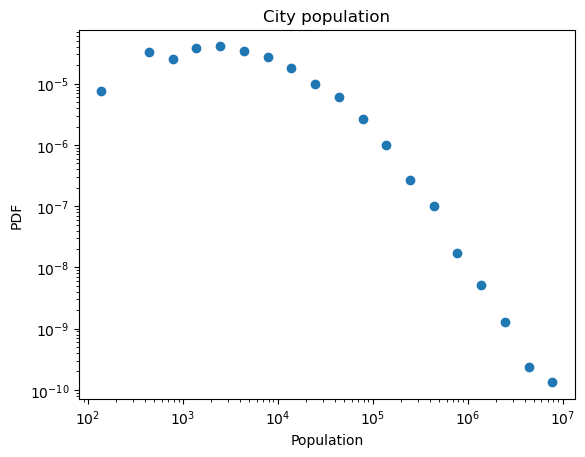

In [2]:
df = pd.read_csv("data_pop2020.csv")
data = df[df.columns[2]]
plt.xscale("log")
plt.yscale("log")
plt.title("City population")
plt.xlabel("Population")
plt.ylabel("PDF")
bins = np.logspace(2, 7, 21) #100 から 10000000 まで
bin_centers = 0.5*(bins[1:] + bins[:-1])
hist,_ = np.histogram(data, bins, density = True)
plt.scatter(bin_centers,hist)
plt.show()

In [4]:
x=bin_centers
y=hist
part_x = np.array(x[x>1e5])
part_y = np.array(y[x>1e5])
log_part_x = np.log(part_x)
log_part_y = np.log(part_y)
model = LinearRegression()
model.fit(log_part_x.reshape(-1,1), log_part_y)
print(f'slope: {model.coef_[0]:.2f}')
print(f'intercept: {model.intercept_:.2f}')

slope: -2.31
intercept: 13.61


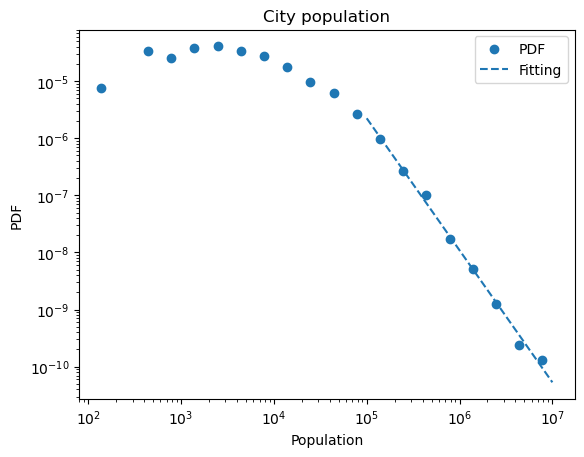

In [5]:
#가시화
x_fit = np.logspace(5, 7, 51)
y_fit = np.exp(model.intercept_) * np.power(x_fit,model.coef_[0]) #POWER 거듭제곱으로 로그회귀 복원
plt.xscale("log")
plt.yscale("log")
plt.title("City population")
plt.xlabel("Population")
plt.ylabel("PDF")
plt.scatter(x,y,label="PDF")
plt.plot(x_fit, y_fit, label='Fitting',ls="--")
plt.legend()
plt.savefig("PDA_230868_7_2.png")
plt.show()